In [20]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# RQs 1 
Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

# Authors dataframe

Description of dataset: 
1. I loaded the dataset and see that the dataframe have 11 column and 352504 sample.
2. I check the basic info about it, so i checked if there are some null value and alse the type of each variable to understand how to work with them
3. With the function describe() i have analyzed the most important statistical function.

In [36]:
df=pd.read_json('lighter_authors.json',lines=True)
df.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [ ]:
count_lines = sum(1 for line in open('lighter_authors.json'))
count_lines
#the total of sample are 352504

check if there is any duplicate row

In [50]:
import json


# Inizializza un set per tenere traccia delle righe duplicate
seen_rows = set()

# Inizializza una lista per tenere traccia delle righe duplicate
duplicate_rows = []

# Itera attraverso le righe del JSON
for row in df:
    # Converte ciascuna riga in una stringa JSON e verifica se è già stata vista
    row_json = json.dumps(row, sort_keys=True)
    if row_json in seen_rows:
        duplicate_rows.append(row)
    else:
        seen_rows.add(row_json)

# Stampa o salva le righe duplicate
if duplicate_rows:
    print("duplicated row found: ")
    for duplicate in duplicate_rows:
        print(duplicate)
else:
    print("No duplicate rows found.")


Nessuna riga duplicata trovata.


In [33]:
df.info() #seems that there isn't null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [34]:
df.isnull().sum() #checked if there is null value

ratings_count         0
average_rating        0
text_reviews_count    0
work_ids              0
book_ids              0
works_count           0
id                    0
name                  0
gender                0
image_url             0
about                 0
fans_count            0
dtype: int64

In [ ]:
df.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


In [ ]:
df.tail()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
351762,19,4.26,3,"[79663810, 56338563, 65881656]","[53075671, 35051340, 42264980]",3,16777034,Lyon Gamer,male,https://images.gr-assets.com/authors/149373532...,Lyon Gamer<br />nickname sotto cui si nasconde...,0
351763,11,3.36,2,[42091916],[22604300],1,16777055,Brian Hatch,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Brian was born, he lived a little, and he has ...",0
351764,23,3.78,5,"[61906297, 61366902, 45107362]","[40246014, 39710679, 25363358]",3,16777067,Nicholas Baer,male,https://s.gr-assets.com/assets/nophoto/user/m_...,Nicholas Baer is Visiting Assistant Professor ...,1
351765,0,0.00,0,[50301486],[29919838],1,16777091,James Ketron Ross,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"James Ross was a physician, winemaker, artist,...",0
351766,1,5.00,0,[49933850],[29597374],1,16777164,James Ross,,https://s.gr-assets.com/assets/nophoto/user/u_...,<i>Librarian Note: There is more than one auth...,0


<AxesSubplot:ylabel='Frequency'>

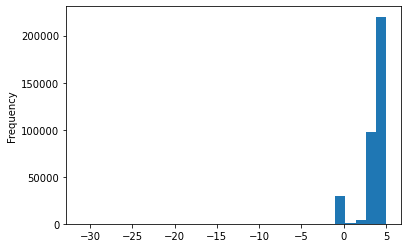

In [39]:
df.average_rating.plot.hist(bins=30)

ratings_count         0
average_rating        0
text_reviews_count    0
work_ids              0
book_ids              0
works_count           0
id                    0
name                  0
gender                0
image_url             0
about                 0
fans_count            0
average,rating        0
dtype: int64

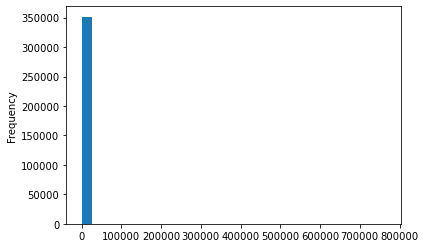

In [60]:
df.fans_count.plot.hist(bins=30)
df[df['fans_count']<0].count() #fans count <0 non ha senso we have to delete them
df[df['fans_count']>0].count() #269415 su 352504
df[df['fans_count']>50000].count() #only 69

From this plot seems that the most of the author have a number of fans that is included in a rege of 0 to 50000, so i wont to check how many sample are over 50000 and i found only 69 sample. I think that is good because only the most famouse author have this amount of fans.
A strange thing is the value of fans_count less than 0 that are 23 so i want to sobstitute them with a null value, because they could potentially cause issue in the future estimations. This considerations are equal for all the value of average_rating and ratings_count less than 0.

In [56]:
#the data with rating <0 are not relevant because probably they are wrong
wrong_data = (df['average_rating'] < 0)
wrong_data1 = (df['ratings_count'] < 0)
wrong_data2 = (df['fans_count'] < 0)

df.loc[wrong_data, 'average_rating'] = np.nan
df.loc[wrong_data1, 'ratings_count'] = np.nan
df.loc[wrong_data2, 'fans_count'] = np.nan

Now i want to found the mismatching between works_id and works_count, so i create a new DataFrame called clean_data that contains only the rows where the length of the 'work_ids' column is not equal to the 'works_count' value. 

In [67]:
clean_data= df.loc[df.apply(lambda row: len(row['work_ids'])!=row['works_count'],axis=1)]
df['mismatch']=df.apply(lambda row: len(row['work_ids'])!=row['works_count'],axis=1)



# Books dataframe

In [ ]:
count_lines = sum(1 for line in open('lighter_books.json'))
count_lines

         id                                              title  \
0         2  Harry Potter and the Order of the Phoenix (Har...   
1         3  Harry Potter and the Sorcerer's Stone (Harry P...   
2         4  Harry Potter and the Chamber of Secrets (Harry...   
3         5  Harry Potter and the Prisoner of Azkaban (Harr...   
4         6  Harry Potter and the Goblet of Fire (Harry Pot...   
...     ...                                                ...   
9994  15512                                       Total Recall   
9995  15513  For Love of Evil (Incarnations of Immortality,...   
9996  15514                                             Phthor   
9997  15515                    The Magic Fart (Pornucopia, #2)   
9998  15516                 Phaze Doubt (Apprentice Adept, #7)   

                                                authors    author_name  \
0     [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J.K. Rowling   
1     [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...   J

This dataframe have 7029332 rows and 25 column

I decide to create more chunk to work on this big dataframe.

In [ ]:

chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)

for chunk in chunks:
   
    print(chunk.info())


We have to remove the column authors because it contain some value that we already have as author id and name and also frequently this values is null. Infact in a group of 10000 values, author isn't null only 3742 times, so only the 37,42%. so i think it can be removed. 

In [24]:

import pandas as pd

col_to_remove = 'authors'


chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)
for i, chunk in enumerate(chunks):
    
    if col_to_remove in chunk.columns:
        chunk = chunk.drop(columns=[col_to_remove])
    print(chunk.info())
    print(chunk.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9999 non-null   int64  
 1   title                      9999 non-null   object 
 2   author_name                9999 non-null   object 
 3   author_id                  9999 non-null   int64  
 4   work_id                    9999 non-null   int64  
 5   isbn                       9999 non-null   object 
 6   isbn13                     9999 non-null   object 
 7   asin                       9999 non-null   object 
 8   language                   9999 non-null   object 
 9   average_rating             9999 non-null   float64
 10  rating_dist                9999 non-null   object 
 11  ratings_count              9999 non-null   int64  
 12  text_reviews_count         9999 non-null   int64  
 13  publication_date           9999 non-null   objec

KeyboardInterrupt: 

I want to see if there are also in this dataframe wrong value of rating i do that at the sart only in the first chanck to be more faster

In [72]:

chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)

for i, chunk in enumerate(chunks):


    filtered_chunk = chunk[chunk.average_rating < 0]

  
    print(f"Result for the chunk {i}:")
    print(filtered_chunk)




Risultati per il chunk 0:
Empty DataFrame
Columns: [id, title, authors, author_name, author_id, work_id, isbn, isbn13, asin, language, average_rating, rating_dist, ratings_count, text_reviews_count, publication_date, original_publication_date, format, edition_information, image_url, publisher, num_pages, series_id, series_name, series_position, shelves, description]
Index: []

[0 rows x 26 columns]
Risultati per il chunk 1:
Empty DataFrame
Columns: [id, title, author_name, author_id, work_id, isbn, isbn13, asin, language, average_rating, rating_dist, ratings_count, text_reviews_count, publication_date, original_publication_date, format, edition_information, image_url, publisher, num_pages, series_id, series_name, series_position, shelves, description, authors]
Index: []

[0 rows x 26 columns]
Risultati per il chunk 2:
Empty DataFrame
Columns: [id, title, author_name, author_id, work_id, isbn, isbn13, asin, language, average_rating, rating_dist, ratings_count, text_reviews_count, public

KeyboardInterrupt: 

In this case there isn't wrong value of rating

In [73]:
#check the duplicated title
chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)
for i, chunk in enumerate(chunks):
    
    chunk[chunk.title.duplicated()]

KeyboardInterrupt: 

There are many book duplicated, but i think that each row is different because of the review that are different

# RQs2
1. Plot the number of books for each author in descending order.

In [ ]:

chunks = pd.read_json('lighter_books.json', lines=True, chunksize=10000)
for i, chunk in enumerate(chunks):
    chunks1 = chunk[['title', 'author_id', 'work_id']]
    chunks1 = chunks1.drop_duplicates()

    author_books_count = chunks1.groupby('author_id')['work_id'].count().reset_index()
   
    author_books_count.rename(columns={'work_id': 'num_books'}, inplace=True)
    author_books_count = author_books_count.sort_values(by='num_books', ascending=False)

  